# 👋🌍 Hello, world: Submit a Q# job to Rigetti

In this notebook, we'll review the basics of Azure Quantum by submitting a simple *job*, or quantum program, to [Rigetti](https://www.rigetti.com/). We will use [Q#](https://learn.microsoft.com/azure/quantum/user-guide/) to express the quantum job.

## Submit a simple job to Rigetti using Azure Quantum
Azure Quantum provides several ways to express quantum programs. In this example we are using Q#, but note that Qiskit is also supported. All code in this example will be written in Python and Q#.

Let's begin. When you see a code block, hover over it and click the triangle play-button to execute it. To avoid any compilation issues, this should be done in order from top to bottom.

### 1. Connect to the Azure Quantum workspace

To connect to the Azure Quantum service, initialize the `Workspace` as seen below.

In [1]:
from azure.quantum import Workspace

workspace = Workspace(
            resource_id = "",
            location = "")



We can use the resulting object to see which _targets_ are available for submission.

In [2]:
print("This workspace's targets:")
for target in workspace.get_targets():
    print("-", target.name)


This workspace's targets:
- ionq.qpu.aria-1
- ionq.qpu.aria-2
- ionq.simulator
- microsoft.estimator
- quantinuum.qpu.h1-1
- quantinuum.sim.h1-1sc
- quantinuum.sim.h1-1e
- rigetti.sim.qvm
- rigetti.qpu.ankaa-2


### ❕ Do you see `rigetti.sim.qvm` in your list of targets? If so, you're ready to keep going.

Don't see it? You may need to add Rigetti to your workspace to run this sample. Navigate to the **Providers** page in the portal and click **+Add** to add the Rigetti provider.

## Rigetti: The quantum provider
Azure Quantum partners with third-party companies to deliver solutions to quantum jobs. These company offerings are called *providers*. Each provider can offer multiple *targets* with different capabilities. See the table below for Rigetti's targets.

| Target name | Target ID | Number of qubits | Description |
| --- | --- | --- | --- |
| Rigetti QVM (simulator) | `rigetti.sim.qvm` | 20 qubits | Rigetti's cloud-based, [open-source](https://github.com/quil-lang/qvm) "Quantum Virtual Machine" simulator. Free to use. |
| Ankaa-9q-1 (hardware) | `rigetti.qpu.ankaa-9q-1` | 9 qubits | A 4th-generation, square-lattice processor. Pricing based on QPUs. |
| Ankaa-2 (hardware) | `rigetti.qpu.ankaa-2` | 84 qubits | A 4th-generation, square-lattice processor. Pricing based on QPUs. |

For this example, we will use `rigetti.sim.qvm`. To learn more about Rigetti's targets, check out [Rigetti's Azure Quantum documentation](https://learn.microsoft.com/azure/quantum/provider-rigetti).

### 2. Build the quantum program

Let's create a simple Q# program to run.

First, let's initialize the Q# environment and set the target profile to Base Profile. Today, Azure Quantum targets only support the Base Profile, a subset of all Q# commands.

In [3]:
import qsharp
qsharp.init(target_profile=qsharp.TargetProfile.Base)


Q# initialized with configuration: {'targetProfile': 'base', 'languageFeatures': None, 'manifest': None}

In [4]:
%%qsharp
open Microsoft.Quantum.Measurement;
open Microsoft.Quantum.Arrays;
open Microsoft.Quantum.Convert;

operation GenerateRandomBit() : Result {
    use target = Qubit();

    // Apply an H-gate and measure.
    H(target);
    return M(target);
}


In [5]:
# Compile the qsharp operation
operation = qsharp.compile("GenerateRandomBit()")


The program you built is a simple quantum random bit generator. With Rigetti's simulator, we will be able to estimate the probability of measuring a `1` or `0`.

### 3. Submit the quantum program to Rigetti


We will use the `target.submit` function to run the quantum program above on Rigetti's `rigetti.sim.qvm` target. This may take a minute or so ⏳. Your job will be packaged and sent to Rigetti, where it will wait its turn to be run.

In [6]:
# Set the target to rigetti.sim.qvm
target = workspace.get_targets("rigetti.sim.qvm")

# Execute the job. We'll use 100 shots (simulated runs).
job = target.submit(operation, "Generate one random bit", shots=100)
print("Job Id:" + job.id)

result = job.get_results()


Job Id:d4e2bcb6-7e3d-11ef-ae1e-00155d96fc17
.........

The job ID can be used to retrieve the results later using the [get_job method](https://learn.microsoft.com/python/azure-quantum/azure.quantum.workspace?#azure-quantum-workspace-get-job) or by viewing it under the **Job management** section of the portal.

### 4. Visualize job results 
You can also view a histogram of the results using [`pyplot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html):

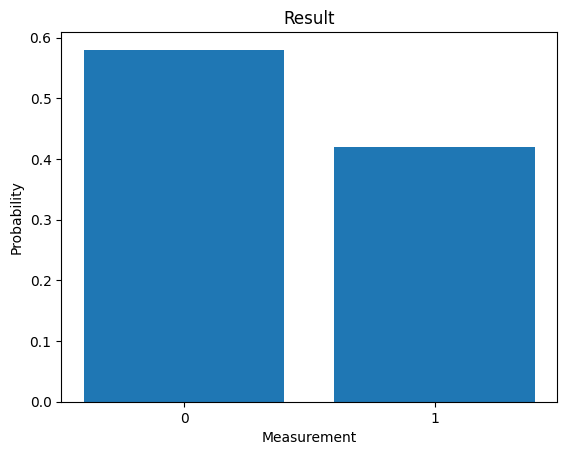

In [7]:
from matplotlib import pyplot

pyplot.bar(result.keys(), result.values())
pyplot.title("Result")
pyplot.xlabel("Measurement")
pyplot.ylabel("Probability")

pyplot.show()



**See the histogram above? Congratulations, you've submitted a job with Azure Quantum! 👏**


### 5. Next steps
Next, you can try running a program on one of Rigetti's hardware targets. Just replace `rigetti.sim.qvm` with `rigetti.qpu.ankaa-9q-1`. Or try another sample by navigating back to the sample gallery. The same "hello world" sample can be run with different quantum providers by choosing another option in the gallery card drop-down menu. Don't worry - your work here is automatically saved.

To learn more about submitting jobs to Azure Quantum using Q#, refer to the [Azure Quantum documentation](https://learn.microsoft.com/azure/quantum/how-to-submit-jobs?pivots=ide-python&tabs=tabid-python).

To learn more about job pricing, review [Azure Quantum's pricing documentation](https://learn.microsoft.com/azure/quantum/azure-quantum-job-costs).